In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")

In [3]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

'Windows'

In [4]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [5]:
# from google.colab import drive
# drive.mount('/content/mnt')

In [6]:
# data_folder = '/content/mnt/MyDrive/data/국민건강보험공단_진료내역정보_20191231'

In [7]:
# df_train2_dummy = pd.read_csv(f'{data_folder}/df_train2_dummy.csv', encoding='euc-kr')

In [8]:
df_train = pd.read_csv("C:/Users/sweet/OneDrive/바탕 화면/국민건강보험공단_진료내역정보_20191231/df_train.csv", encoding="euc-kr")
df_train2_dummy = pd.read_csv("C:/Users/sweet/OneDrive/바탕 화면/국민건강보험공단_진료내역정보_20191231/df_train2_dummy.csv", encoding="euc-kr")

In [9]:
for i in df_train.columns:
    df_train[i] = df_train[i].astype('category')

In [10]:
for i in df_train2_dummy.columns:
    df_train2_dummy[i] = df_train2_dummy[i].astype('category')

In [11]:
df_train2_dummy.dtypes

Unnamed: 0    category
성별코드          category
연령대코드         category
시도코드          category
진료과목코드        category
주상병코드         category
부상병코드         category
심결가산율         category
서식코드_0        category
서식코드_1        category
dtype: object

In [12]:
df_train2_dummy

,Unnamed: 0,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,서식코드_0,서식코드_1
0,0,2,11,28,1,9,9,1,1,0
1,1,1,8,31,3,5,5,1,1,0
2,2,2,12,41,9,12,12,1,1,0
3,3,2,5,11,21,6,5,1,1,0
4,4,1,16,45,12,7,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...
567919,567919,1,16,42,1,12,3,3,0,1
567920,567920,1,6,11,5,18,18,2,0,1
567921,567921,1,4,47,24,17,17,4,0,1
567922,567922,2,1,47,11,15,15,3,0,1


In [13]:
df_train2_dummy.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import plot_tree
import graphviz

In [15]:
# Decision Tree

X = df_train2_dummy.iloc[:, :-2]
y = df_train2_dummy.iloc[:, 7:].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 7)

In [35]:
# 학영님 코드 참고

clf = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=12, min_samples_leaf=200)
model = clf.fit(X_train,y_train)

print(model.score(X_test,y_test))

0.8569177268125192


In [36]:
clf_2 = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=12, min_samples_leaf=200)
model_2 = clf_2.fit(X_train, y_train)
print(clf_2.score(X_test, y_test))

0.8569177268125192


In [37]:
# 학영님 코드 참고

tree.export_graphviz(
    model, # 학습한 모형
    out_file = 'model.dot', # .dot 파일 저장 위치
    feature_names = list(X.columns), # 사용한 변수 이름
    class_names = ['입원함', '입원안함'], # 예측할 타겟 클래스 이름
)


In [38]:
# 학영님 코드 참고

score = []
for i in range(3,20) : 
  tree2 = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=i, min_samples_leaf=200)
  tree2.fit(X_train,y_train)
  score.append(tree2.score(X_test,y_test))
print(score)

[0.8462208918431131, 0.8462208918431131, 0.8489413214773077, 0.8494607562618304, 0.8517497909054893, 0.8525949729277633, 0.8541268653431351, 0.8554650702117357, 0.855966897037461, 0.8569177268125192, 0.8585200510630805, 0.8593476251265572, 0.8593476251265572, 0.8594620768587401, 0.8595941365497205, 0.8596117445085178, 0.8597350002200995]


In [39]:
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['0', '1']))
print(f'Accuracy: {accuracy*100}')

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     56793
           1       0.83      0.90      0.86     56792

   micro avg       0.86      0.86      0.86    113585
   macro avg       0.86      0.86      0.86    113585
weighted avg       0.86      0.86      0.86    113585
 samples avg       0.86      0.86      0.86    113585

Accuracy: 85.69177268125192


In [40]:
# kflod 모델 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 6, shuffle = True, random_state = 100)

print("cross validation score : {}".format(cross_val_score(model, X_train, y_train, cv = kfold)))

cross validation score : [0.85432624 0.85749376 0.85523553 0.85623919 0.85606751 0.85697873]


In [42]:

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print('Confusion Matrix: \n', cm)

Accuracy: 0.86
Confusion Matrix: 
 [[46000 10793]
 [ 5459 51333]]


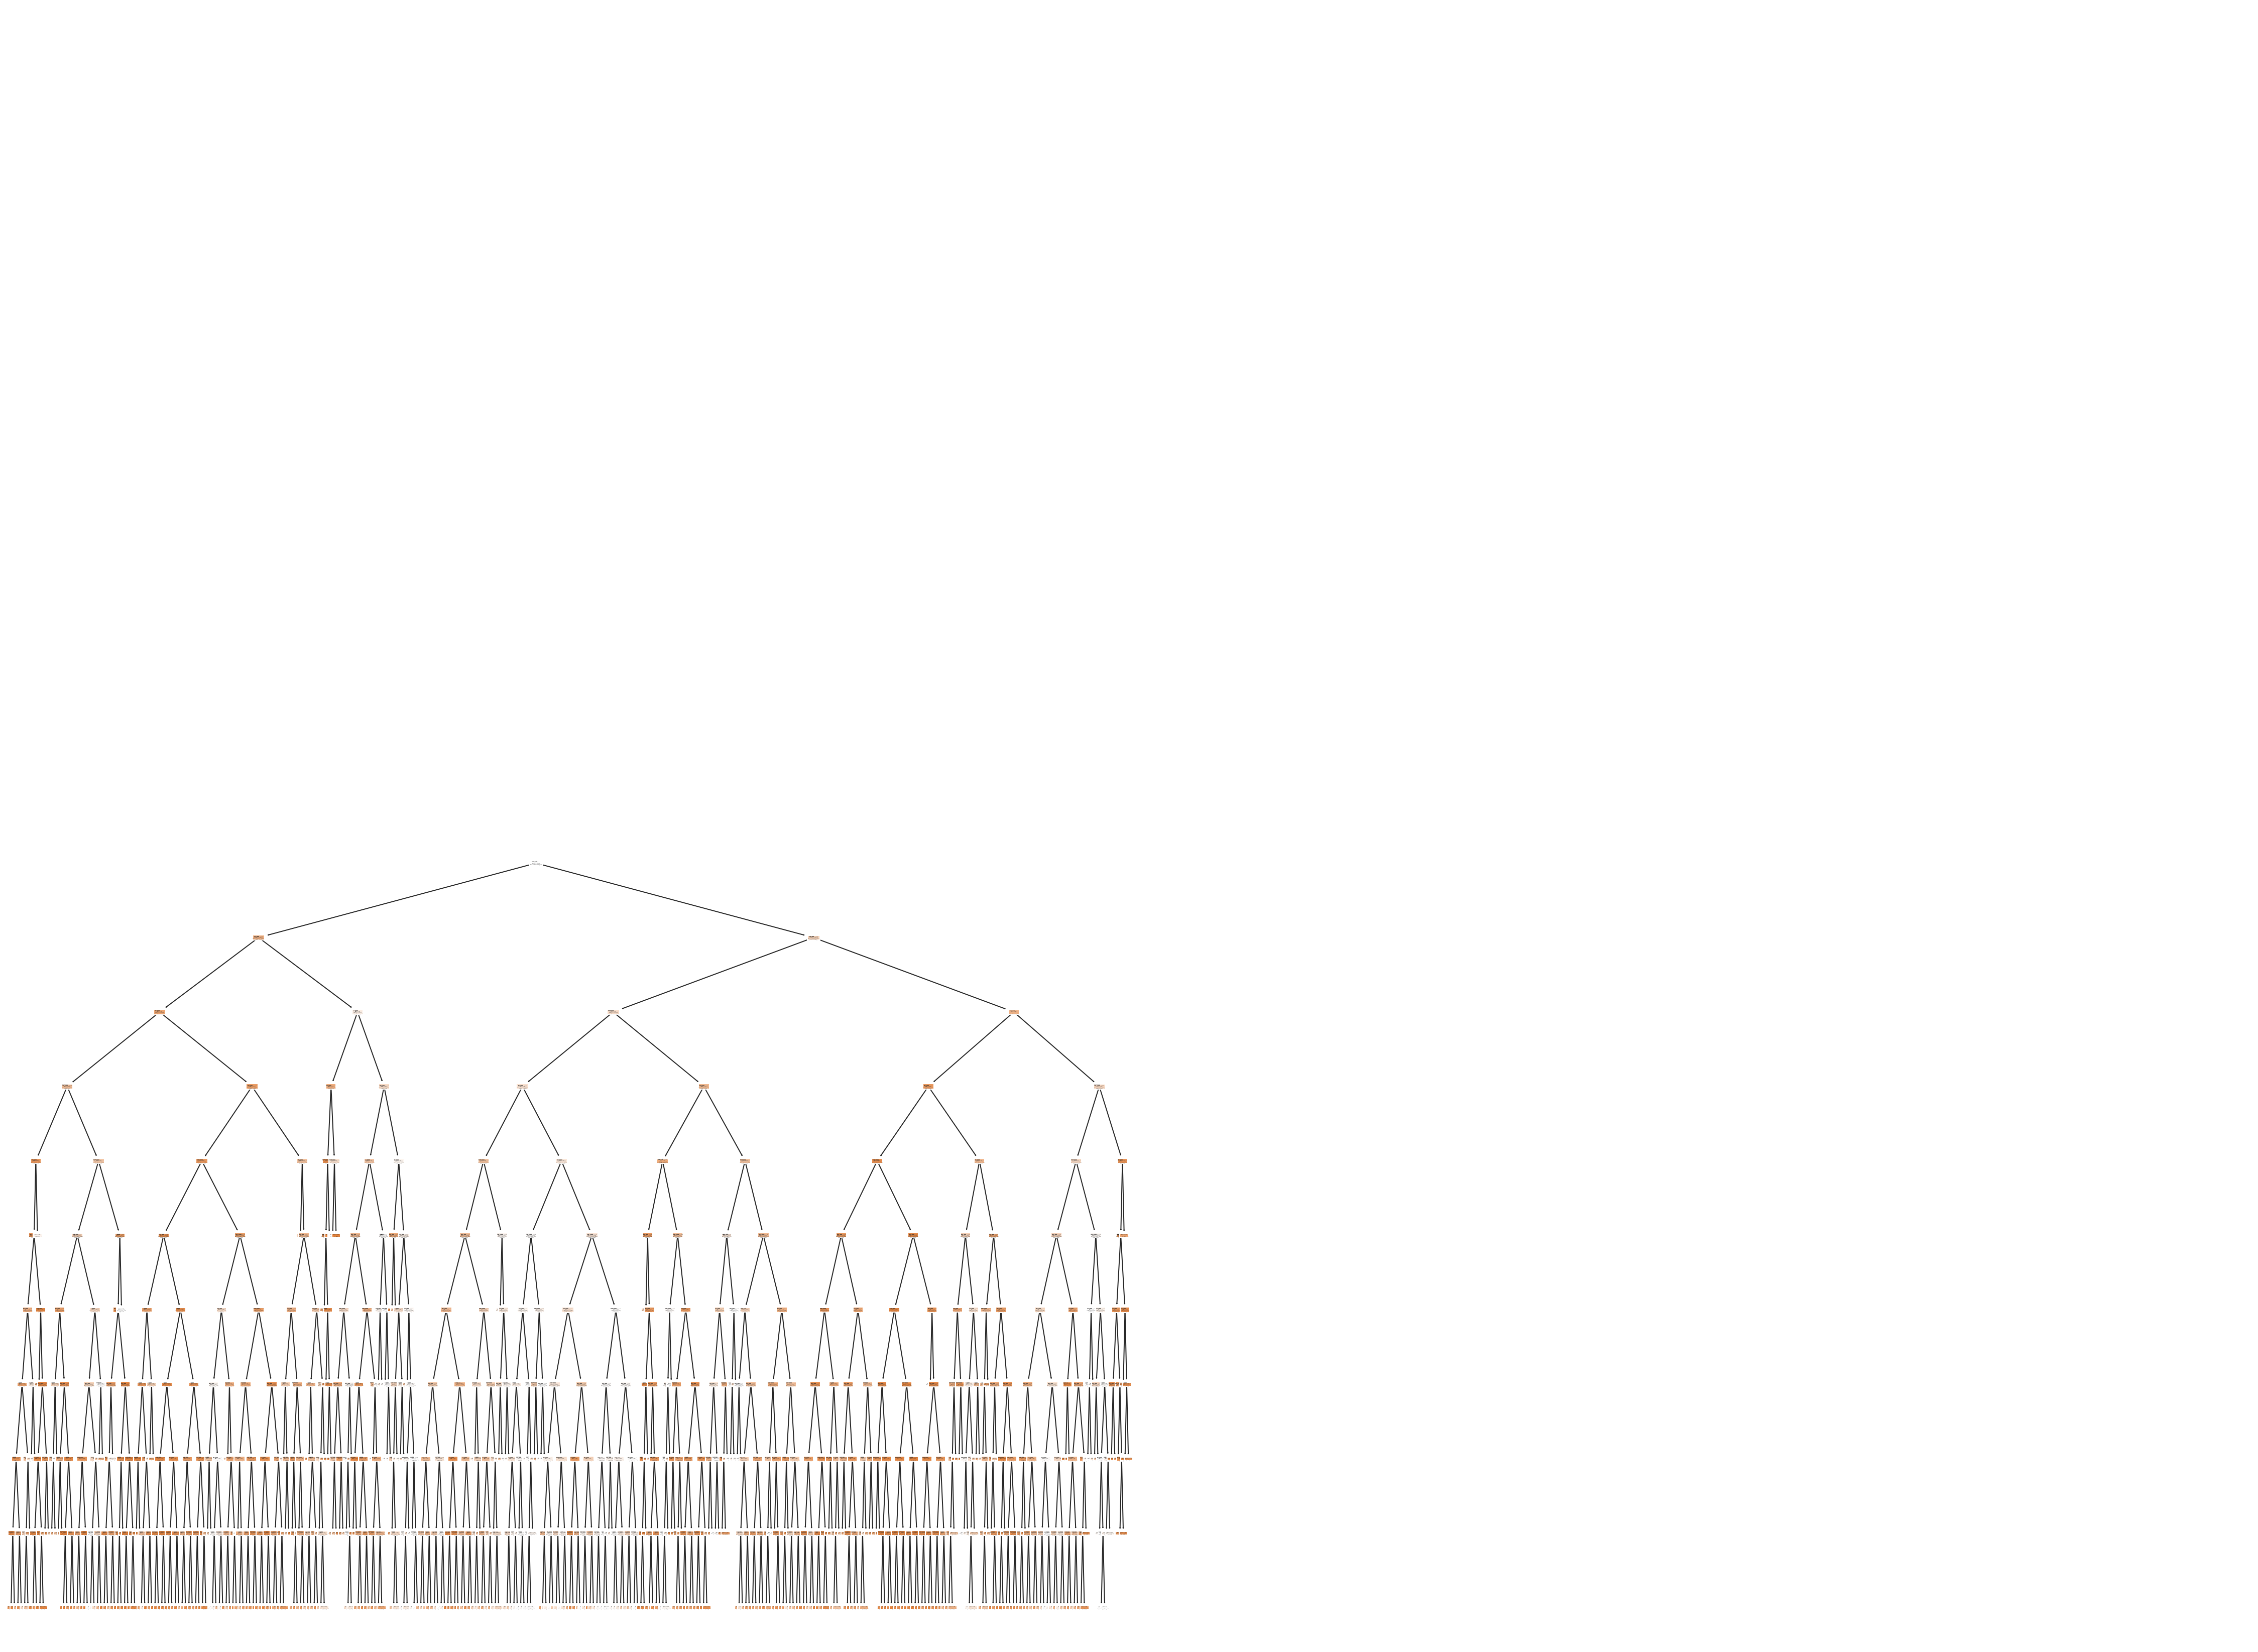

In [23]:
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(clf, feature_names=X.columns, class_names=['입원함', '입원안함'], filled=True)

In [24]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
# with open("model.dot", encoding='utf-8') as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)